### Imports

In [65]:
import os
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

hs_blau = "#22376f"
#mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["#0645ad", "#800020", "#1EB9E7", ])

### Einlesen der Daten

In [66]:
bevölkerung = pd.read_excel(f"Data\\12411-0012_complete.xlsx", index_col=0)

#read sterbefälle pro monat
sterbefälle_monat = pd.read_excel(f"Data\\sonderauswertung-sterbefaelle_saisonal.xlsx", sheet_name='D_2016-2022_Monate_AG_Ins') #Datensatz ist selbst zusammengebaut
sterbefälle_monat = sterbefälle_monat[sterbefälle_monat.columns].replace(["-",".","X "],0)
sterbefälle_monat

,Nr.,Jahr,Alter,Januar,Februar,März,April,Mai,Juni,Juli,August,September,Oktober,November,Dezember,Insgesamt
0,18,2021,Insgesamt,106579,82090,81801,81717,80818,76731,76613,76340,77774,84877,93561,102529,1021430
1,19,2021,0-15,296,222,290,260,310,303,290,308,299,319,306,287,3490
2,20,2021,15-30,291,276,295,333,328,387,362,312,343,362,319,343,3951
3,21,2021,30-35,236,184,243,230,216,205,242,229,241,238,213,235,2712
4,22,2021,35-40,328,298,365,340,392,360,305,356,386,382,314,400,4226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,387,2000,75-80,12695,11668,10979,10282,10020,9795,9784,9956,9537,10346,10313,10911,126286
370,388,2000,80-85,10350,9692,8954,8351,8124,7919,8018,7948,7977,8702,8806,9370,104211
371,389,2000,85-90,15951,14812,13574,12355,11838,11343,11402,11365,11133,11863,12123,12829,150588
372,390,2000,90-95,9386,8742,7715,7130,6838,6863,6655,6894,6652,7409,7617,8126,90027


### Altersgruppen 90-95 und 95+ zu 90+ zusammenfassen

In [67]:
#Sterbefälle einteilen
#bildet summe aus gruppe 90-95 und gruppe ü 95, ersetzt die 90-95 row damit, benennt sie um und dropt die ü95 reihe.
new_row = (sterbefälle_monat.loc[sterbefälle_monat["Alter"]=="90-95"]) + (sterbefälle_monat.loc[sterbefälle_monat["Alter"]=="95 u. mehr"])
age_90_95 = sterbefälle_monat.loc[sterbefälle_monat["Alter"]=="90-95"]
mehr_95 = sterbefälle_monat.loc[sterbefälle_monat["Alter"]=="95 u. mehr"]

new_row = age_90_95.iloc[0,3:] + mehr_95.iloc[0,3:]
index_95 = list(age_90_95.index)
index_mehr = list(mehr_95.index)

for i in range (len(index_95)):
    new_row = age_90_95.iloc[i,3:] +mehr_95.iloc[i,3:]
    sterbefälle_monat.loc[index_95[i], "Januar":] = new_row
    sterbefälle_monat.drop(index_mehr[i], inplace=True)


sterbefälle_monat['Alter'].replace({'90-95': '90<'}, inplace = True)
sterbefälle_monat = sterbefälle_monat.rename(columns={'Januar': 1,'Februar': 2,'März': 3,'April': 4,'Mai': 5,'Juni': 6,'Juli': 7,'August': 8,'September': 9,'Oktober': 10,'November': 11,'Dezember': 12})
sterbefälle_monat

,Nr.,Jahr,Alter,1,2,3,4,5,6,7,8,9,10,11,12,Insgesamt
0,18,2021,Insgesamt,106579,82090,81801,81717,80818,76731,76613,76340,77774,84877,93561,102529,1021430
1,19,2021,0-15,296,222,290,260,310,303,290,308,299,319,306,287,3490
2,20,2021,15-30,291,276,295,333,328,387,362,312,343,362,319,343,3951
3,21,2021,30-35,236,184,243,230,216,205,242,229,241,238,213,235,2712
4,22,2021,35-40,328,298,365,340,392,360,305,356,386,382,314,400,4226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,386,2000,70-75,9576,8819,8517,7974,7959,7688,7667,7973,7490,8283,7917,8572,98435
369,387,2000,75-80,12695,11668,10979,10282,10020,9795,9784,9956,9537,10346,10313,10911,126286
370,388,2000,80-85,10350,9692,8954,8351,8124,7919,8018,7948,7977,8702,8806,9370,104211
371,389,2000,85-90,15951,14812,13574,12355,11838,11343,11402,11365,11133,11863,12123,12829,150588


### Beispiel Jahr 2021

In [68]:
print(sterbefälle_monat.loc[sterbefälle_monat["Jahr"]==2021])


    Nr.  Jahr      Alter       1      2      3      4      5      6      7  \
0    18  2021  Insgesamt  106579  82090  81801  81717  80818  76731  76613   
1    19  2021       0-15     296    222    290    260    310    303    290   
2    20  2021      15-30     291    276    295    333    328    387    362   
3    21  2021      30-35     236    184    243    230    216    205    242   
4    22  2021      35-40     328    298    365    340    392    360    305   
5    23  2021      40-45     527    474    526    525    547    501    480   
6    24  2021      45-50     900    772    867    825    869    791    840   
7    25  2021      50-55    1967   1703   1766   1875   1800   1652   1631   
8    26  2021      55-60    3468   2908   3113   3301   3233   3091   3052   
9    27  2021      60-65    4989   4293   4382   4513   4600   4320   4296   
10   28  2021      65-70    6776   5653   5840   6068   6016   5572   5555   
11   29  2021      70-75    8321   6769   7156   7385   7495   6

### Altersgruppen in 0-15, 15-30, 30-35, ..., 85-90, 90+ aufteilen

In [69]:
#alle Altersgruppen einteilen
rows = []
x = 0
j = 0
for k in range (1 ,32):
    x=0
    for i in range(0, 92):
        k2 = k*91
        if i == 0 and k == 1:
            bevölkerungs_anzahl = bevölkerung.loc[bevölkerung.index[0]]["Gesamt"] #Gesamtbevölkerung je altersgruppe
        if i == 0 and k != 1:
            bevölkerungs_anzahl = bevölkerung.loc[bevölkerung.index[i+(k-1)*92]]["Gesamt"]
        else:
            bevölkerungs_anzahl = bevölkerung.loc[bevölkerung.index[i+((k-1)*92)]]["Gesamt"]

        if ( i < 15):
            x += bevölkerungs_anzahl
            if (i == 14):
                rows.append([1990+k-1,"0 - "+"<{}".format(i+1), x])
                x = 0   

        elif (i >= 15 and  i < 30):
    
            x += bevölkerungs_anzahl
            if i == 29:
                rows.append([1990+k-1,(str(i-14)+" - <"+str(i+1)), x])

            
                x = 0

        elif (i >= 30 and  i < 90):
            j += 1
            x += bevölkerungs_anzahl
            if j == 5:
                rows.append([1990+k-1,(str(i-4)+" - <"+str(i+1)), x])
                j = 0
                x = 0

        elif i == 90:
            x += bevölkerungs_anzahl
            rows.append([1990+k-1,"90=<", x])
            x = 0

        elif i == 91:
            x += bevölkerungs_anzahl
            rows.append([1990+k-1,"Gesamt", x])
            x=0
       
        

new_df = pd.DataFrame(rows, columns=["Jahr","Alter", "Anzahl"])
new_df

,Jahr,Alter,Anzahl
0,1990,0 - <15,12937503
1,1990,15 - <30,17692503
2,1990,30 - <35,6249072
3,1990,35 - <40,5651627
4,1990,40 - <45,5050480
...,...,...,...
491,2020,75 - <80,3468028
492,2020,80 - <85,3430502
493,2020,85 - <90,1662241
494,2020,90=<,843691


### Standardbevölkerung auf 2020 festlegen

In [70]:
standard_bevölkerung = new_df.loc[new_df["Jahr"]==2020]
standard_bevölkerung

,Jahr,Alter,Anzahl
480,2020,0 - <15,11477800
481,2020,15 - <30,13340204
482,2020,30 - <35,5581088
483,2020,35 - <40,5290876
484,2020,40 - <45,5034888
485,2020,45 - <50,5035860
486,2020,50 - <55,6487224
487,2020,55 - <60,6817318
488,2020,60 - <65,5818137
489,2020,65 - <70,4899104


# Altersbereinigung


### Rohe Sterberate

In [71]:
#rohe sterberate
#loop über jahre
sterberaten_roh_sessional = []
for n in range(0,21):
    sterberate_gesamt = 0
    z_vor_jahr = sterbefälle_monat.loc[(sterbefälle_monat["Jahr"]==2021-(n+1))].reset_index(drop= True) #2019
    z = sterbefälle_monat.loc[(sterbefälle_monat["Jahr"]==2021-n)].reset_index(drop= True) #2020
    gesamt_bev_vor_jahr = new_df.loc[new_df["Jahr"]==2021-(n+1)]["Anzahl"].reset_index(drop= True)

    #loop über altersgruppen
    for age in range(1,16,1):
        todeszahlen_sessional_ingesamt = 0
        for monat in range (1,13):
            if monat <= 6:
                todeszahlen_sessional_ingesamt += z_vor_jahr[monat+6][age]
            else:
                todeszahlen_sessional_ingesamt += z[monat-6][age]

        mri = (todeszahlen_sessional_ingesamt / gesamt_bev_vor_jahr[15]) * 100000  #sterberate je altersgruppe #2019 Bevoelkerung
        sterberate_gesamt += mri

    sterberaten_roh_sessional.append([2021-(n+1), sterberate_gesamt])
    sterberate_gesamt = 0

sterberaten_roh = pd.DataFrame(sterberaten_roh_sessional, columns=["Jahr", "Sterberate_Roh"])
sterberaten_roh

,Jahr,Sterberate_Roh
0,2020,1215.895163
1,2019,1135.472341
2,2018,1123.713375
3,2017,1142.022166
4,2016,1136.660459
5,2015,1094.217847
6,2014,1137.283265
7,2013,1056.645793
8,2012,1116.522820
9,2011,1077.567072


### Altersbereinigte Sterberate (Standardbevölkerung: 2020)

In [72]:
#altersbereinigt
sterberaten_bereinigt = []

#loop über jahre
for n in range(0,20):
    erg_sum = 0
    sum = 0
    z_vor_jahr = sterbefälle_monat.loc[(sterbefälle_monat["Jahr"]==2021-(n+1))].reset_index(drop= True) #2020
    z = sterbefälle_monat.loc[(sterbefälle_monat["Jahr"]==2021-n)].reset_index(drop= True) #2021
    gesamt_bev_vor_jahr = new_df.loc[new_df["Jahr"]==2021-(n+1)]["Anzahl"].reset_index(drop= True) # new_df eingeteilte Altergruppen

    q = new_df.loc[new_df["Jahr"]==2020-n] #alle Jahre
    gesamt_bev = standard_bevölkerung.loc[standard_bevölkerung.index[15]][2]
    #loop über Altersgruppen
    for i in range(1,16,1):
        todeszahlen_sessional_ingesamt = 0
        for monat in range (1,13):
            if monat <= 6:
                todeszahlen_sessional_ingesamt += z_vor_jahr[monat+6][i]
            else:
                todeszahlen_sessional_ingesamt += z[monat-6][i]

        asx = standard_bevölkerung.loc[standard_bevölkerung.index[i-1]][2] #bevölkerung je altersgruppe Standardbevölkerung
        bevölkerung_grp = q.loc[q.index[i-1]][2] #größe Bevölkerungsruppe untersuchte Bevölkerung
        subx = (todeszahlen_sessional_ingesamt / bevölkerung_grp) * 100000 #sterberate je altersgruppe
        sum += (asx * subx)

    erg = sum / gesamt_bev
    erg_sum += erg
    sterberaten_bereinigt.append([2021-(n+1), erg_sum])

sterberaten_bereinigt = pd.DataFrame(sterberaten_bereinigt, columns=["Jahr", "Sterberate_bereinigt"])
sterberaten_bereinigt

,Jahr,Sterberate_bereinigt
0,2020,1215.895163
1,2019,1156.601500
2,2018,1170.637639
3,2017,1206.208112
4,2016,1216.607425
5,2015,1190.314950
6,2014,1251.252646
7,2013,1187.350592
8,2012,1277.470033
9,2011,1255.592268


### Rohe vs. alteresbereinigte Sterblichkeit plotten

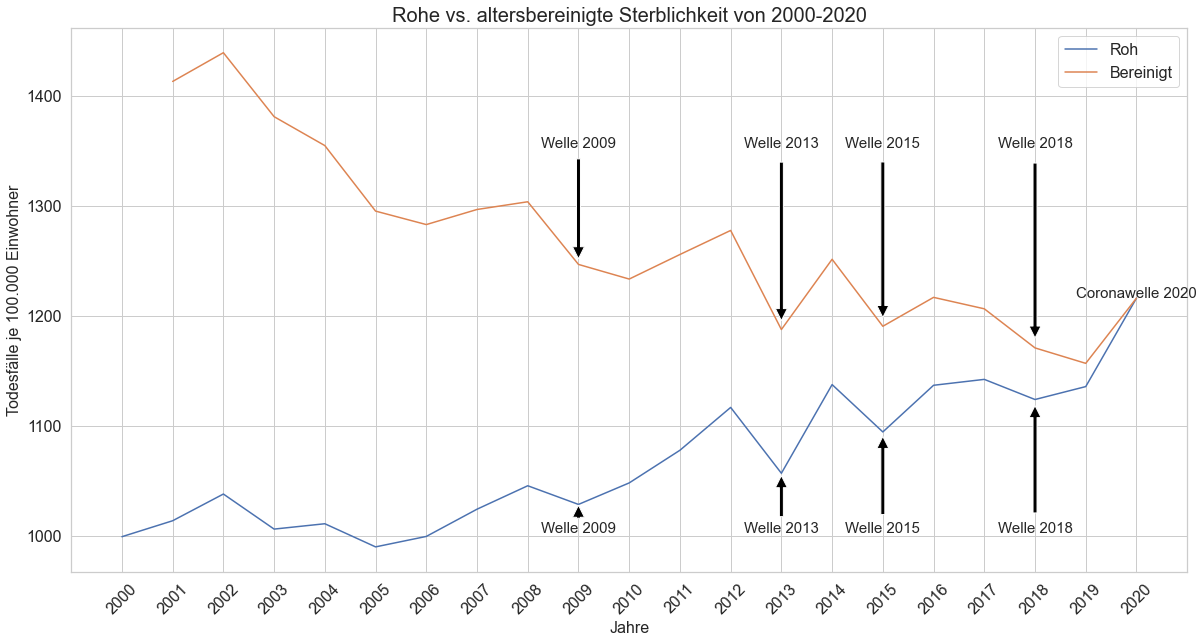

In [73]:
xticks = [i for i in range(2000,2021)]

ax = sns.lineplot(x="Jahr",  y='Sterberate_Roh', data=sterberaten_roh)
sns.lineplot(ax=ax, x="Jahr",  y='Sterberate_bereinigt', data=sterberaten_bereinigt)
plt.legend(labels=['Roh','Bereinigt'],fontsize= 16)
sns.set_theme(style="whitegrid")
plt.xticks(rotation=45)

# annotate lines
grippe_wellen = [2009,2013,2015,2018,2020]

for weave in grippe_wellen:
    sel_year_raw = sterberaten_roh.loc[sterberaten_roh["Jahr"] == weave]
    raw_year = sel_year_raw.Jahr
    raw_death = sel_year_raw.Sterberate_Roh

    sel_year_cleaned = sterberaten_bereinigt.loc[sterberaten_bereinigt["Jahr"] == weave]
    cleaned_year = sel_year_cleaned.Jahr
    cleaned_death = sel_year_cleaned.Sterberate_bereinigt
    if  weave == 2020:
     ax.annotate("Coronawelle " + str(weave), xy=(raw_year, raw_death),xycoords='data', size = 15,ha='center')
    else:
        ax.annotate("Welle "+str(weave), xy=(raw_year, raw_death), xycoords='data',xytext=(raw_year, 1000), size = 15,ha='center',arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left',
            verticalalignment='bottom')

        ax.annotate("Welle " +str(weave), xy=(cleaned_year, cleaned_death),xycoords='data',xytext=(cleaned_year, 1350),size = 15, ha='center',arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left',
            verticalalignment='bottom')

ax.set_ylabel("Todesfälle je 100.000 Einwohner", fontsize = 16)
ax.set_xlabel("Jahre", fontsize = 16)
ax.set_title("Rohe vs. altersbereinigte Sterblichkeit von 2000-2020",fontsize = 20)
plt.xticks(range(min(xticks), max(xticks)+1, 1), fontsize=16)
plt.yticks(fontsize=16)
# plt.ylabel("Sterberate je 100.000 Einwohner")
# plt.xticks(df_grippe_w.index, df_grippe_w["Alter"], rotation=45)
# plt.axis([0, 14, 0, 5000])
plt.gcf().set_size_inches(20, 10)

# Berechnung der Comparative Mortality Ratio

In [74]:
cmr_df = pd.DataFrame(sterberaten_bereinigt, columns=["Jahr", "Sterberate_bereinigt"])
cmr_df["cmr"] = 0 # Damit Colum erzeugt wird
for i in range (len(cmr_df)):
    cmr_df["cmr"][i] = cmr_df["Sterberate_bereinigt"][i]/sterberaten_roh["Sterberate_Roh"][i]
cmr_df

C:\Users\mikes\AppData\Local\Temp\ipykernel_38296\3004264294.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cmr_df["cmr"][i] = cmr_df["Sterberate_bereinigt"][i]/sterberaten_roh["Sterberate_Roh"][i]


,Jahr,Sterberate_bereinigt,cmr
0,2020,1215.895163,1.000000
1,2019,1156.601500,1.018608
2,2018,1170.637639,1.041758
3,2017,1206.208112,1.056204
4,2016,1216.607425,1.070335
5,2015,1190.314950,1.087823
6,2014,1251.252646,1.100212
7,2013,1187.350592,1.123698
8,2012,1277.470033,1.144150
9,2011,1255.592268,1.165210


### Verlauf CMR plotten

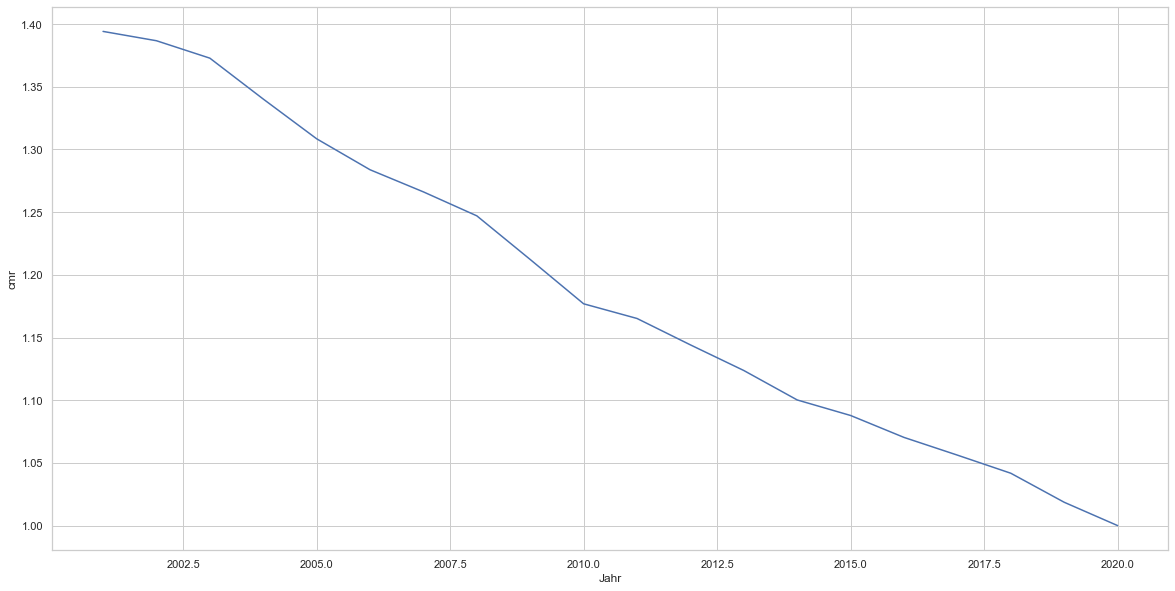

In [75]:
ax = sns.lineplot(x="Jahr",  y='cmr', data=cmr_df)
sns.set(font_scale=2)
plt.gcf().set_size_inches(20, 10)

### Trend von CMR berechnen

In [76]:
#Berechnung des Trendes
trend_area = cmr_df.loc[(cmr_df.Jahr >= 2017)]
trend_area = trend_area.sort_values(by="Jahr")
trend_area = trend_area.reset_index(drop=True)
trend_area

,Jahr,Sterberate_bereinigt,cmr
0,2017,1206.208112,1.056204
1,2018,1170.637639,1.041758
2,2019,1156.601500,1.018608
3,2020,1215.895163,1.000000


In [77]:
##Erstellen der Trendline
coeff = np.polyfit(trend_area.Jahr, trend_area.cmr ,1) # 1 = linear
m = coeff[0]
b = coeff[1]


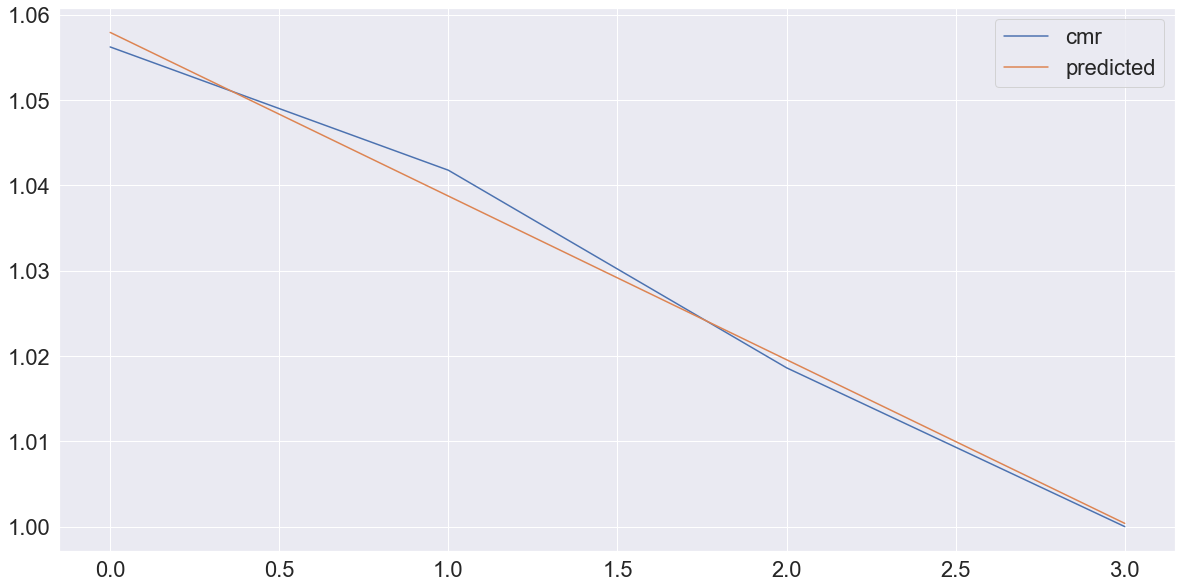

In [78]:
trend_area['predicted'] = pd.Series(np.polyval(coeff, trend_area.Jahr))
sns.set(font_scale=2)
trend_area[['cmr', 'predicted']].plot()
plt.gcf().set_size_inches(20, 10)

### Anhand von Trend CMR von 2021 bestimmen

In [79]:
cmr_df.loc[-1] = [2021, np.polyval(coeff, 2021)* cmr_df.loc[(cmr_df["Jahr"]==2020)]["Sterberate_bereinigt"][0], np.polyval(coeff, 2021)]  # adding a row
cmr_df.index = cmr_df.index + 1  # shifting index
cmr_df.sort_index(inplace=True)
cmr_df

,Jahr,Sterberate_bereinigt,cmr
0,2021.0,1193.039063,0.981202
1,2020.0,1215.895163,1.000000
2,2019.0,1156.601500,1.018608
3,2018.0,1170.637639,1.041758
4,2017.0,1206.208112,1.056204
5,2016.0,1216.607425,1.070335
6,2015.0,1190.314950,1.087823
7,2014.0,1251.252646,1.100212
8,2013.0,1187.350592,1.123698
9,2012.0,1277.470033,1.144150


### Verlauf CMR plotten

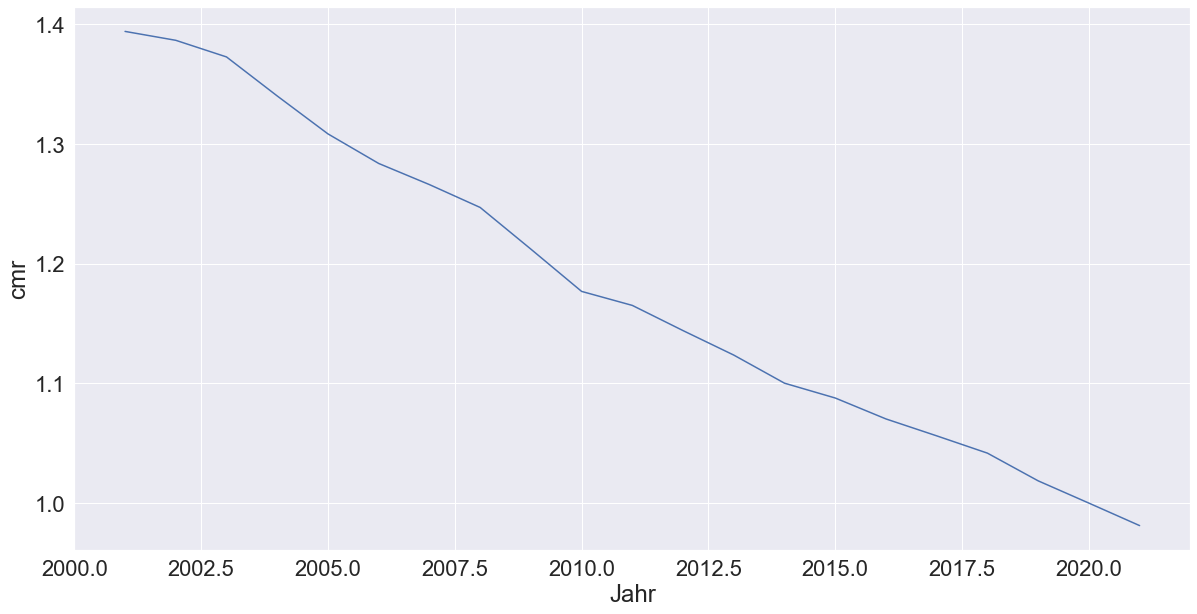

In [80]:
ax = sns.lineplot(x="Jahr",  y='cmr', data=cmr_df)
sns.set(font_scale=2)
plt.gcf().set_size_inches(20, 10)

# Berechnung des Erwartungswerts

In [81]:
#Gesamtbevölkerung je Jahr
df_gesamt_bev =  new_df.loc[new_df.Alter == "Gesamt"][["Jahr", "Anzahl"]]
df_gesamt_bev = df_gesamt_bev.loc[df_gesamt_bev.Jahr >1999].sort_values("Jahr",ascending=False).reset_index(drop= True)
df_gesamt_bev

,Jahr,Anzahl
0,2020,83155031
1,2019,83166711
2,2018,83019213
3,2017,82792351
4,2016,82521653
5,2015,82175684
6,2014,81197537
7,2013,80767463
8,2012,80523746
9,2011,80327900


In [82]:
#Todesfälle altersbereinigt und roh

sterberaten_bereinigt["Todesfälle_altersbereinigt"] = (sterberaten_bereinigt.Sterberate_bereinigt/100000) * df_gesamt_bev.Anzahl
sterberaten_bereinigt["Todesfälle_rohe"] = (sterberaten_roh.Sterberate_Roh/100000) * df_gesamt_bev.Anzahl
pd.options.display.float_format = '{:.10f}'.format
sterberaten_bereinigt

,Jahr,Sterberate_bereinigt,Todesfälle_altersbereinigt,Todesfälle_rohe
0,2020,1215.8951633365,1011077.9999999999,1011077.9999999999
1,2019,1156.6014996005,961907.4265943907,944335.0000000001
2,2018,1170.6376393466,971854.1552673280,932898.0000000000
3,2017,1206.2081122843,998648.0541129260,945507.0000000000
4,2016,1216.6074254725,1003964.5580206341,937991.0000000000
5,2015,1190.3149502260,978149.4521024633,899181.0000000000
6,2014,1251.2526461438,1015986.3303160741,923445.9999999999
7,2013,1187.3505921658,958992.9502077632,853425.9999999999
8,2012,1277.4700331561,1028666.7247247633,899066.0000000000
9,2011,1255.5922680115,1008590.9014560367,865587.0000000001


In [83]:
#Split in train und Test
lm_test_df = sterberaten_bereinigt.loc[(sterberaten_bereinigt["Jahr"] > 1999) & (sterberaten_bereinigt["Jahr"] < 2020 )]
lm_test_df

,Jahr,Sterberate_bereinigt,Todesfälle_altersbereinigt,Todesfälle_rohe
1,2019,1156.6014996005,961907.4265943907,944335.0000000001
2,2018,1170.6376393466,971854.1552673280,932898.0000000000
3,2017,1206.2081122843,998648.0541129260,945507.0000000000
4,2016,1216.6074254725,1003964.5580206341,937991.0000000000
5,2015,1190.3149502260,978149.4521024633,899181.0000000000
6,2014,1251.2526461438,1015986.3303160741,923445.9999999999
7,2013,1187.3505921658,958992.9502077632,853425.9999999999
8,2012,1277.4700331561,1028666.7247247633,899066.0000000000
9,2011,1255.5922680115,1008590.9014560367,865587.0000000001
10,2010,1233.2530024402,1008204.0862079645,856647.9999999999


In [84]:
#Datensatz aufbereiten
df = lm_test_df.copy()
df = df.sort_values('Jahr')
df = df.reset_index(drop= True)
df

,Jahr,Sterberate_bereinigt,Todesfälle_altersbereinigt,Todesfälle_rohe
0,2001,1412.9682704859,1164855.4082605368,835504.0000000001
1,2002,1439.1094508231,1187793.1622755930,856526.9999999999
2,2003,1380.9244316613,1139700.0086973265,830163.9999999999
3,2004,1354.6302307554,1117581.4411838378,833867.0000000000
4,2005,1295.0602689436,1067621.7197587034,815881.9999999999
5,2006,1282.8054422115,1055940.0939193100,822482.0000000000
6,2007,1296.5261028031,1065975.7178650736,841883.0000000000
7,2008,1303.5501393646,1068941.8259202552,857159.0000000000
8,2009,1246.5682084754,1019720.9295773787,841182.9999999999
9,2010,1233.2530024402,1008204.0862079645,856647.9999999999


In [85]:
##Erstellen der Trendline
coeff_2021 = np.polyfit(df.Jahr, df.Todesfälle_altersbereinigt ,2) # 1 = linear, 2 = x^2
m_2021 = coeff_2021[0]
b_2021 = coeff_2021[1]


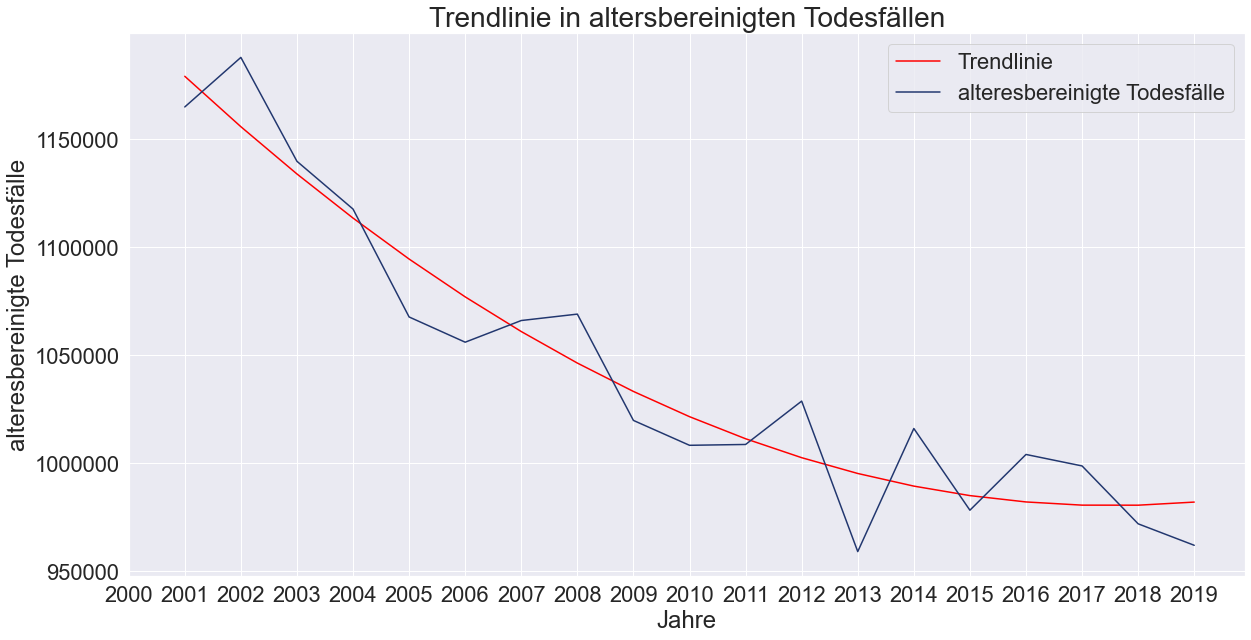

In [86]:



df['predicted'] = pd.Series(np.polyval(coeff_2021, df.Jahr))
sns.set(font_scale=2)


ax = sns.lineplot(x="Jahr",  y='predicted', data=df, color ="red")
plot_linear = sns.lineplot(ax=ax, x="Jahr",  y='Todesfälle_altersbereinigt', data=df, color=hs_blau)
plt.legend(labels=['Trendlinie', 'alteresbereinigte Todesfälle'])
sns.set_theme(style="whitegrid")

plot_linear.set_title("Trendlinie in altersbereinigten Todesfällen", fontsize= 28)
plot_linear.ticklabel_format(axis="y", style="plain")
plot_linear.set_ylabel("alteresbereinigte Todesfälle")
plot_linear.set_xlabel("Jahre")
plt.xticks(range(2000, 2020, 1))

plt.gcf().set_size_inches(20, 10)



### Erwartungswert Tote 2020

In [87]:
pred_totesfaelle = np.polyval(coeff_2021, 2020)  # adding a row
pred_totesfaelle

984805.5122323036

### Erwartungswert Tote von 2000-2021

In [88]:
#Erwarteten Todesfälle
erwartungswerte = []

#bestimmen der erwarteten Toten von 2000 - 2010 anhand polyfit insgesamt
for idx2 in range(2000,2010,1):    
    erwartungswerte.append([idx2,np.polyval(coeff_2021, idx2)])

#bestimmen der erwarteten Toten von 2010 - 2021 anhand polyfit der letzten 10 jahre
for idx in range(1999,2010,1):
    
    temp_df = sterberaten_bereinigt.loc[(sterberaten_bereinigt["Jahr"] > idx) & (sterberaten_bereinigt["Jahr"] < idx+11)]
    coeff_temp = np.polyfit(temp_df.Jahr, temp_df.Todesfälle_altersbereinigt ,2) # 1 = linear
    m_temp = coeff_temp[0]
    b_temp = coeff_temp[1]
    erwartungswerte.append([idx+12,np.polyval(coeff_2021, idx+12)])

df_erwartungswerte = pd.DataFrame(erwartungswerte, columns=["Jahr", "Erwartete Todesfälle"])
df_erwartungswerte


,Jahr,Erwartete Todesfälle
0,2000,1203855.1191892624
1,2001,1179057.1952400208
2,2002,1155716.6864070892
3,2003,1133833.5926895142
4,2004,1113407.9140887260
5,2005,1094439.6506032944
6,2006,1076928.8022336960
7,2007,1060875.3689799309
8,2008,1046279.3508424759
9,2009,1033140.7478208542


In [89]:
df_2011_bis_2020 = sterberaten_bereinigt.loc[sterberaten_bereinigt.Jahr > 2000].sort_values("Jahr").reset_index(drop=True)
df_2011_bis_2020["Delta_erwartet_altersbereinigt"] = df_2011_bis_2020["Todesfälle_altersbereinigt"] - df_erwartungswerte["Erwartete Todesfälle"]
df_2011_bis_2020

,Jahr,Sterberate_bereinigt,Todesfälle_altersbereinigt,Todesfälle_rohe,Delta_erwartet_altersbereinigt
0,2001,1412.9682704859,1164855.4082605368,835504.0000000001,-38999.7109287255
1,2002,1439.1094508231,1187793.1622755930,856526.9999999999,8735.9670355723
2,2003,1380.9244316613,1139700.0086973265,830163.9999999999,-16016.6777097627
3,2004,1354.6302307554,1117581.4411838378,833867.0000000000,-16252.1515056763
4,2005,1295.0602689436,1067621.7197587034,815881.9999999999,-45786.1943300227
5,2006,1282.8054422115,1055940.0939193100,822482.0000000000,-38499.5566839844
6,2007,1296.5261028031,1065975.7178650736,841883.0000000000,-10953.0843686224
7,2008,1303.5501393646,1068941.8259202552,857159.0000000000,8066.4569403243
8,2009,1246.5682084754,1019720.9295773787,841182.9999999999,-26558.4212650972
9,2010,1233.2530024402,1008204.0862079645,856647.9999999999,-24936.6616128897


### Mean und Standardabweichung

In [90]:
# mean sollte ~ 0 sein
mean_delta = df_2011_bis_2020.Delta_erwartet_altersbereinigt.mean()

#Standardabweichung
std_delta = df_2011_bis_2020.Delta_erwartet_altersbereinigt.std()
print(std_delta)

23760.30587311125


### Barplot über Todesfälle - Erwartete Todesfälle (Altersbereinigt)

In [108]:
labels = [i for i in df_2011_bis_2020["Jahr"]]


20

In [123]:
k = df_2011_bis_2020["Jahr"].tolist()
type(k[0])

int

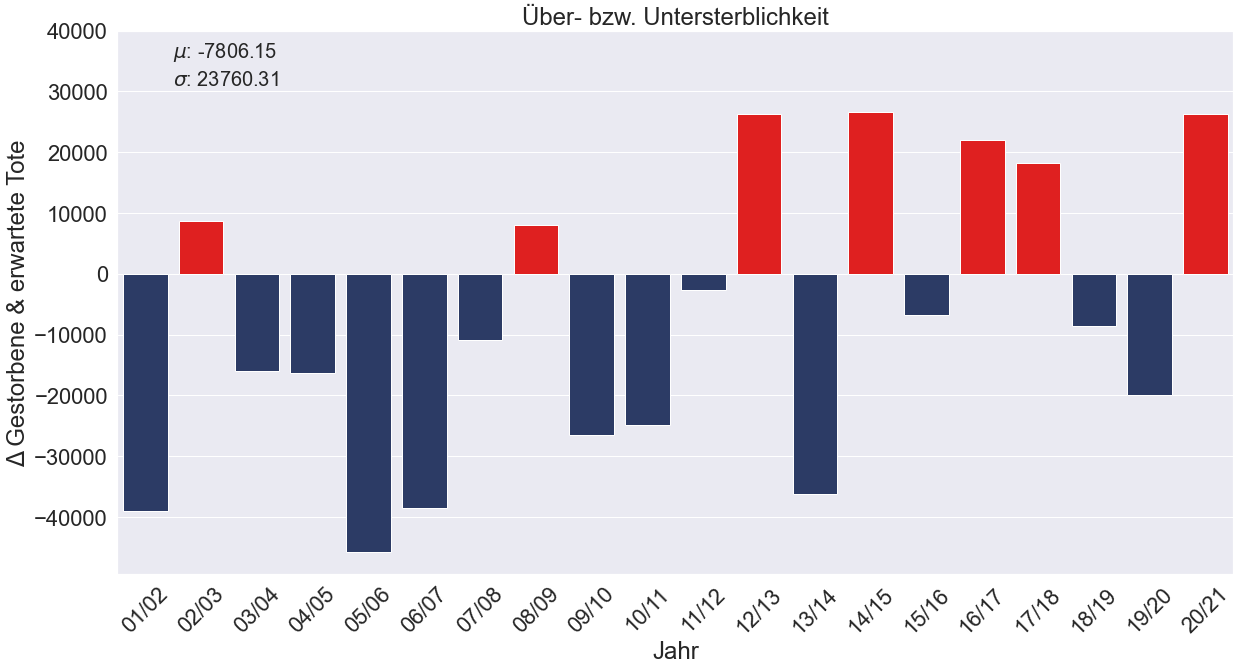

In [133]:
clrs = [hs_blau if y<=0 else 'red' for y in df_2011_bis_2020.Delta_erwartet_altersbereinigt]
labels = ["01/02", "02/03", "03/04", "04/05", "05/06", "06/07", "07/08", "08/09", "09/10", "10/11", "11/12", "12/13", "13/14", "14/15", "15/16", "16/17", "17/18", "18/19", "19/20","20/21"]



barplot_todesfaelle = sns.barplot(data = df_2011_bis_2020, x= "Jahr", y = "Delta_erwartet_altersbereinigt", palette=clrs)
sns.set(font_scale=2)
plt.gcf().set_size_inches(20, 10)

barplot_todesfaelle.axes.annotate(f"$\mu$: {mean_delta:.2f}", xy=(0.05,0.95), xycoords='axes fraction', fontsize = 20)
barplot_todesfaelle.axes.annotate(f"$\sigma$: {std_delta:.2f}", xy=(0.05,0.9), xycoords='axes fraction', fontsize = 20)

barplot_todesfaelle.set_ylabel("Δ Gestorbene & erwartete Tote")
barplot_todesfaelle.set_xlabel("Jahr")
barplot_todesfaelle.set_title("Über- bzw. Untersterblichkeit")
y1 = df_2011_bis_2020.Delta_erwartet_altersbereinigt
plt.yticks(range(-40000, 50000, 10000))
barplot_todesfaelle.set_xticklabels(labels,rotation=45)

plt.gcf().set_size_inches(20, 10)


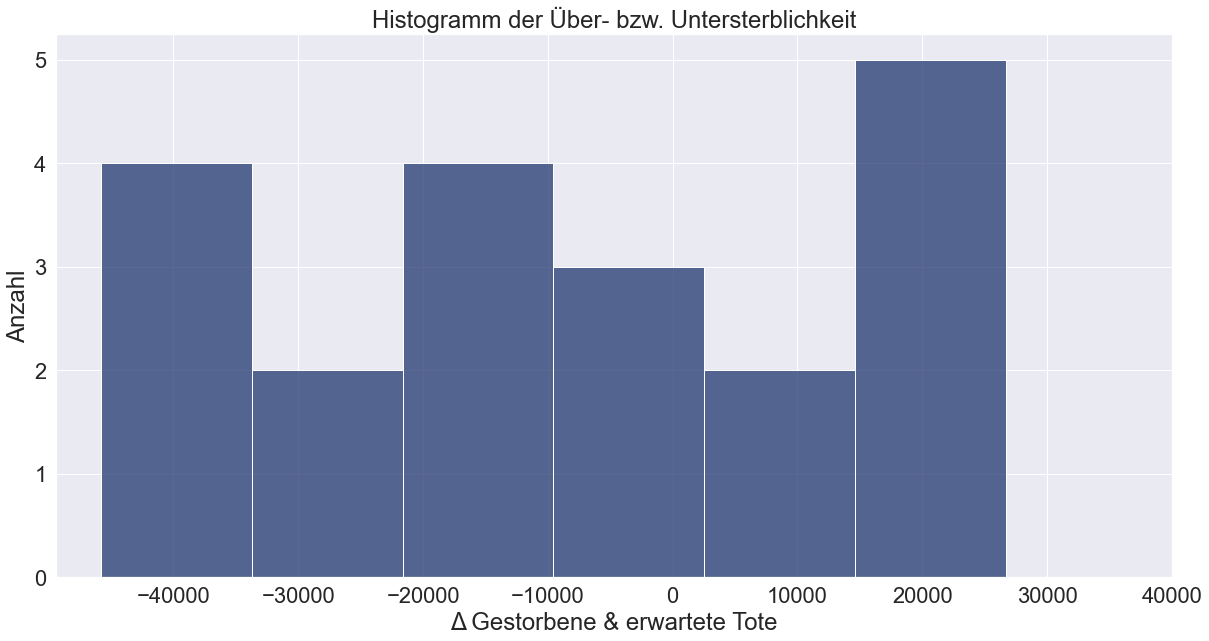

In [92]:
barplot_histo = sns.histplot(data=df_2011_bis_2020, x= "Delta_erwartet_altersbereinigt", color=hs_blau)
barplot_histo.set_ylabel("Anzahl")
barplot_histo.set_xlabel("Δ Gestorbene & erwartete Tote")
barplot_histo.set_title("Histogramm der Über- bzw. Untersterblichkeit")
plt.xticks(range(-40000, 50000, 10000))
plt.gcf().set_size_inches(20, 10)

### Save fig

In [93]:
barplot_todesfaelle = barplot_todesfaelle.get_figure()
barplot_todesfaelle.savefig("barplot_todesfaelle.png", dpi=200)

In [94]:
barplot_histo = barplot_histo.get_figure()
barplot_histo.savefig("barplot_histo.png", dpi=200)

In [95]:
plot_linear = plot_linear.get_figure()
plot_linear.savefig("plot_linear.png", dpi=200)

### Ranking Über- bzw. Untersterblichkeit 

In [96]:
df_2011_bis_2020_sorted  = df_2011_bis_2020.sort_values(by=["Delta_erwartet_altersbereinigt"])
df_2011_bis_2020_sorted = df_2011_bis_2020_sorted.reset_index(drop= True)
years_sorted_by_delta = df_2011_bis_2020_sorted["Jahr"].to_list()

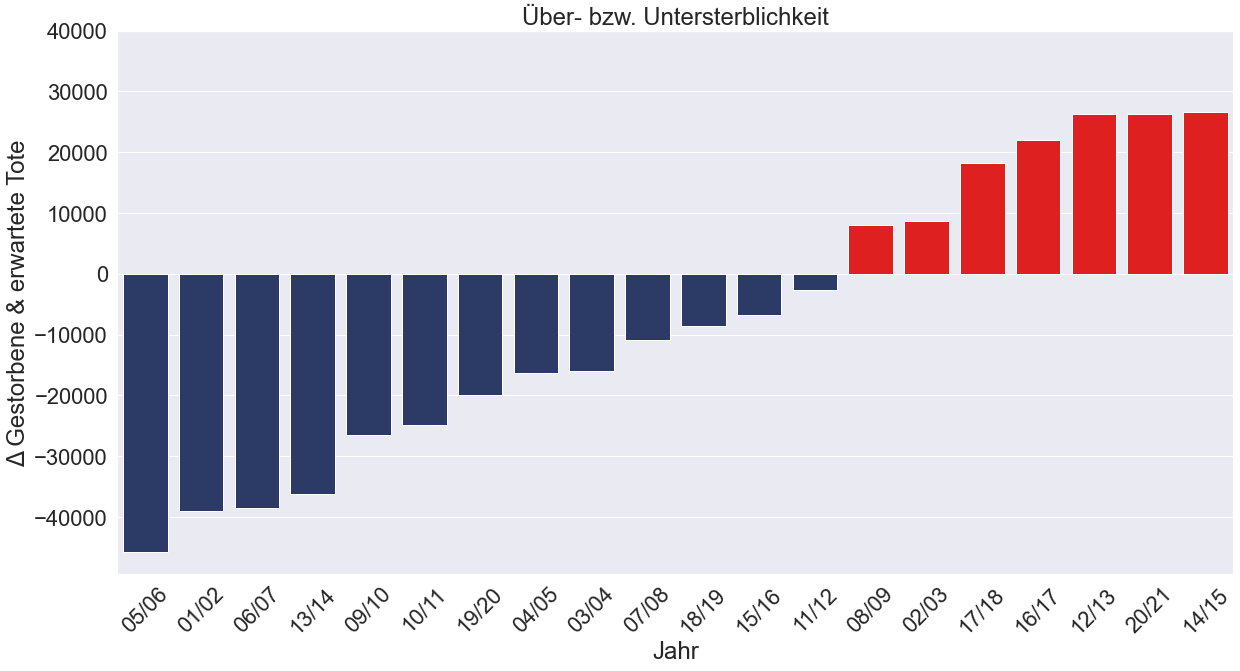

In [141]:
clrs = [hs_blau if y<=0 else 'red' for y in df_2011_bis_2020_sorted.Delta_erwartet_altersbereinigt]
labels = ["05/06", "01/02", "06/07", "13/14", "09/10", "10/11", "19/20", "04/05", "03/04", "07/08", "18/19", "15/16", "11/12", "08/09", "02/03", "17/18", "16/17", "12/13", "20/21", "14/15"]

barplot_todesfaelle_sorted = sns.barplot(data = df_2011_bis_2020_sorted, x= df_2011_bis_2020_sorted.Jahr, y = df_2011_bis_2020_sorted.Delta_erwartet_altersbereinigt, order = years_sorted_by_delta, palette=clrs)
sns.set(font_scale=2)

barplot_todesfaelle_sorted.set_ylabel("Δ Gestorbene & erwartete Tote")
barplot_todesfaelle_sorted.set_xlabel("Jahr")
barplot_todesfaelle_sorted.set_title("Über- bzw. Untersterblichkeit")

barplot_todesfaelle_sorted.set_xticklabels(labels,rotation=45)
plt.yticks(range(-40000, 50000, 10000))
plt.gcf().set_size_inches(20, 10)